# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Leitura dos dados

In [2]:
df = pd.read_json('news.json', lines=True)

df.head()

,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [3]:
df.count()

link                 209527
headline             209527
category             209527
short_description    209527
authors              209527
date                 209527
dtype: int64

In [4]:
df.dtypes

link                         object
headline                     object
category                     object
short_description            object
authors                      object
date                 datetime64[ns]
dtype: object

In [5]:
categories_list = df['category'].unique()

len(categories_list)

42

In [6]:
categories_list

array(['U.S. NEWS', 'COMEDY', 'PARENTING', 'WORLD NEWS', 'CULTURE & ARTS',
       'TECH', 'SPORTS', 'ENTERTAINMENT', 'POLITICS', 'WEIRD NEWS',
       'ENVIRONMENT', 'EDUCATION', 'CRIME', 'SCIENCE', 'WELLNESS',
       'BUSINESS', 'STYLE & BEAUTY', 'FOOD & DRINK', 'MEDIA',
       'QUEER VOICES', 'HOME & LIVING', 'WOMEN', 'BLACK VOICES', 'TRAVEL',
       'MONEY', 'RELIGION', 'LATINO VOICES', 'IMPACT', 'WEDDINGS',
       'COLLEGE', 'PARENTS', 'ARTS & CULTURE', 'STYLE', 'GREEN', 'TASTE',
       'HEALTHY LIVING', 'THE WORLDPOST', 'GOOD NEWS', 'WORLDPOST',
       'FIFTY', 'ARTS', 'DIVORCE'], dtype=object)

# Tratamento da base de dados

## Remoção de duplicatas

In [7]:
duplicate_rows = df[df.duplicated()]
duplicate_rows

,link,headline,category,short_description,authors,date
67677,https://www.huffingtonpost.comhttp://www.mothe...,"On Facebook, Trump's Longtime Butler Calls For...",POLITICS,"Anthony Senecal, who worked as Donald Trump's ...",,2016-05-12
67923,https://www.huffingtonpost.comhttp://gizmodo.c...,Former Facebook Workers: We Routinely Suppress...,TECH,Facebook workers routinely suppressed news sto...,,2016-05-09
70239,https://www.huffingtonpost.comhttp://www.cnbc....,"On Equal Pay Day, The Gap Is Still Too Wide",WOMEN,Equal Pay Day falls on April 12 in 2016. It's ...,,2016-04-12
139830,https://www.huffingtonpost.comhttp://www.cnn.c...,The World's Most Dangerous Workout?,WELLNESS,"Is the ""sport of fitness"" the world's most dan...",,2014-02-10
144409,https://www.huffingtonpost.comhttp://www.upwor...,Some People Call It 'The Best Anti-Smoking Ad ...,WELLNESS,Almost all smokers know cigarettes are bad for...,,2013-12-22
145142,https://www.huffingtonpost.comhttp://www.weath...,10 Cities That Could Run Out Of Water - Weathe...,ENVIRONMENT,"Securing access to plentiful, renewable source...",,2013-12-15
178155,https://www.huffingtonpost.comhttp://www.busin...,Google Is Attacking Apple From The Inside Out ...,TECH,After years of hammering away at Apple's share...,,2013-01-01
187329,https://www.huffingtonpost.comhttp://www.nytim...,"Eating For Health, Not Weight",WELLNESS,Almost half of Americans are on a diet -- not ...,,2012-09-23
194596,https://www.huffingtonpost.comhttp://blogs.wsj...,Apple Removes Green EPEAT Electronics Certific...,TECH,Apple has pulled its products off the U.S. gov...,,2012-07-07
194598,https://www.huffingtonpost.comhttp://www.theda...,Microsoft's $6.2 Billion Writedown Shows It's ...,TECH,Fighting for online advertising dominance with...,,2012-07-07


In [8]:
df = df.drop_duplicates()

In [9]:
df.duplicated(subset=['headline', 'short_description']).sum()

476

In [10]:
# Mostrando duplicatas 
df[df.duplicated(subset=['headline', 'short_description'], keep=False)].sort_values('headline')

,link,headline,category,short_description,authors,date
109100,https://www.huffingtonpost.com/entry/disney-ce...,,BUSINESS,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-25
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
110153,https://www.huffingtonpost.com/entry/beverly-h...,,MEDIA,,"Gary Snyder, ContributorWriter and Media Strat...",2015-01-13
103675,https://www.huffingtonpost.com/entry/us-and-eu...,,WORLDPOST,,"Natasha Srdoc, ContributorAuthor, Economist, C...",2015-03-29
122145,https://www.huffingtonpost.com/entry/beverly-h...,,QUEER VOICES,,"Gary Snyder, ContributorWriter and Media Strat...",2014-08-28
...,...,...,...,...,...,...
192998,https://www.huffingtonpost.com/entry/why-you-s...,Why You Should Watch The Summer Olympics With ...,PARENTING,Every parent wants his child to learn sportsma...,"Betsy Brown Braun, Contributor\nChild developm...",2012-07-24
19009,https://www.huffingtonpost.com/entry/octavia-s...,"With This 'Shape Of Water' Clip, You'll Fall F...",ENTERTAINMENT,Spencer and Sally Hawkins play 1960s janitors ...,Matthew Jacobs,2017-12-05
18974,https://www.huffingtonpost.com/entry/the-shape...,"With This 'Shape Of Water' Clip, You'll Fall F...",ENTERTAINMENT,Spencer and Sally Hawkins play 1960s janitors ...,Matthew Jacobs,2017-12-05
196025,https://www.huffingtonpost.com/entry/yves-sain...,Yves Saint Laurent Name Change: No More 'Yves'...,STYLE & BEAUTY,"According to Women's Wear Daily, Hedi Slimane ...",,2012-06-21


In [11]:
df = df.drop_duplicates(subset=['headline', 'short_description'])

In [12]:
df.count()

link                 209038
headline             209038
category             209038
short_description    209038
authors              209038
date                 209038
dtype: int64

## Células vazias

In [13]:
df.isnull().any().any()

False

In [14]:
# Verificando se há string vazia em 'headline'
headline_empty = df[df['headline'] == '']
headline_empty

,link,headline,category,short_description,authors,date
90944,https://www.huffingtonpost.com/entry/lincoln-2...,,POLITICS,,"Robert Moran, ContributorRobert Moran leads Br...",2015-08-22
95567,https://www.huffingtonpost.com/entry/post_9671...,,RELIGION,Let everyone not wrapped in tired and disprove...,"Matthew Fox, ContributorRadical theologian Mat...",2015-06-30


In [15]:
# Removendo linhas com string vazia em 'headline'
df = df[df['headline'] != '']

In [16]:
# Verificando se há string vazia em 'short_description'
short_description_empty = df[df['short_description'] == '']
short_description_empty

,link,headline,category,short_description,authors,date
20773,https://www.huffingtonpost.com/entry/the-big-b...,The Big Blue Wave,COMEDY,,"Shan Wells, ContributorSciency sun venerator +...",2017-11-10
21523,https://www.huffingtonpost.com/entry/inside-ru...,"Inside Rukban Camp, One Of Syria’s Most Desper...",WORLD NEWS,,"Yasser Allawi, Syria Deeply",2017-10-31
22793,https://www.huffingtonpost.com/entry/syrian-re...,Syrian Refugees Return From Lebanon Only To Fl...,WORLD NEWS,,"Abby Sewell, Refugees Deeply",2017-10-14
32223,https://www.huffingtonpost.com/entry/your-guid...,Your Guide To The Best BBQ In St. Louis Accord...,TASTE,,,2017-06-19
34488,https://www.huffingtonpost.com/entry/the-bechd...,The Bechdel Test,COMEDY,,"Hilary Fitzgerald Campbell, ContributorHilary'...",2017-05-24
...,...,...,...,...,...,...
206924,https://www.huffingtonpost.com/entry/true-lgbt...,True LGBTQ Stories: When A College Football Te...,QUEER VOICES,,"Nathan Manske, Contributor\nExecutive Director...",2012-02-25
206939,https://www.huffingtonpost.com/entry/chasing-i...,'Chasing Ice' -- The Climate Change Debate Is ...,ENVIRONMENT,,"Greg Reitman, Contributor\nFounder of Blue Wat...",2012-02-25
208803,https://www.huffingtonpost.com/entry/love-is-l...,Practice for International Kissing Day: 'Love ...,IMPACT,,"Karen Dalton-Beninato, Contributor\nWriter Nea...",2012-02-05
208865,https://www.huffingtonpost.com/entry/zach-hust...,"Zach Huston, Victim of Brutal Ohio School Bull...",QUEER VOICES,,"Ian Thompson, Contributor\nLegislative Represe...",2012-02-04


In [17]:
# Removendo linhas com string vazia em 'short_description'
df = df[df['short_description'] != '']

In [18]:
df.count()

link                 189426
headline             189426
category             189426
short_description    189426
authors              189426
date                 189426
dtype: int64

# Categorias

In [19]:
categories_count = df['category'].value_counts()
categories_count

category
POLITICS          32427
WELLNESS          17937
ENTERTAINMENT     14772
STYLE & BEAUTY     9667
TRAVEL             9417
PARENTING          8762
FOOD & DRINK       6330
QUEER VOICES       5601
HEALTHY LIVING     5264
BUSINESS           5129
COMEDY             4642
SPORTS             4414
HOME & LIVING      4285
BLACK VOICES       4173
THE WORLDPOST      3664
WEDDINGS           3653
PARENTS            3516
DIVORCE            3423
WORLD NEWS         3295
WOMEN              3136
IMPACT             3085
CRIME              2831
MEDIA              2402
WEIRD NEWS         2316
TECH               2054
GREEN              2044
TASTE              1940
RELIGION           1877
SCIENCE            1803
MONEY              1754
STYLE              1564
ENVIRONMENT        1441
U.S. NEWS          1377
ARTS & CULTURE     1338
WORLDPOST          1242
CULTURE & ARTS     1062
FIFTY              1042
GOOD NEWS          1039
LATINO VOICES      1022
COLLEGE             921
EDUCATION           902
ARTS   

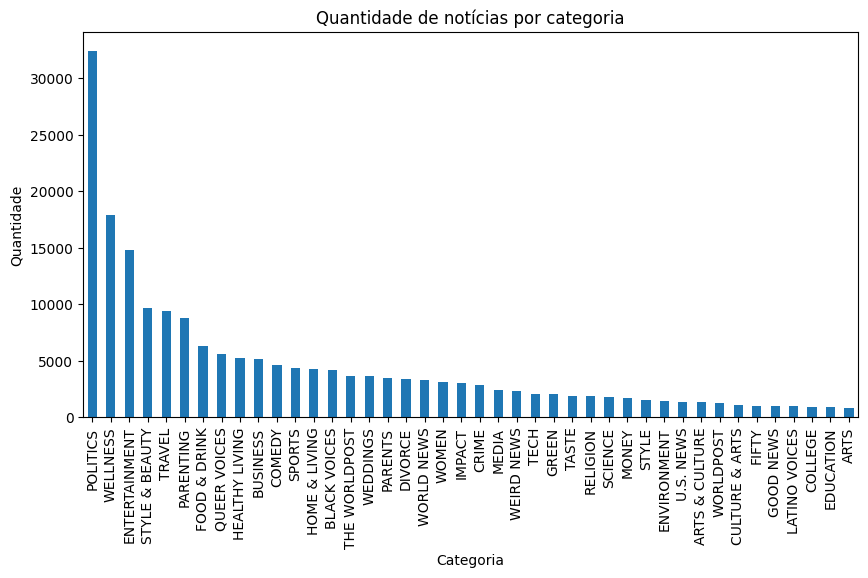

In [20]:
# Visualizando a quantidade de notícias por categoria
df['category'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.title('Quantidade de notícias por categoria')
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
plt.show()

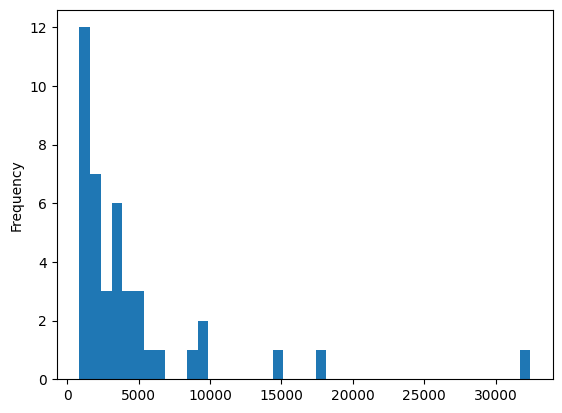

In [21]:
ax = categories_count.plot.hist(bins=42)

In [22]:
# Selecionando as 5 categorias com mais notícias
top_categories = categories_count[:5].index
top_categories

# Filtrando as notícias das 5 categorias com mais notícias
df = df[df['category'].isin(top_categories)]
df['category'].value_counts()

category
POLITICS          32427
WELLNESS          17937
ENTERTAINMENT     14772
STYLE & BEAUTY     9667
TRAVEL             9417
Name: count, dtype: int64

In [23]:
df.count()

link                 84220
headline             84220
category             84220
short_description    84220
authors              84220
date                 84220
dtype: int64

# Quantidade de palavras

In [24]:
# Calculando a quantidade de palavras em cada notícia e colocando em uma nova coluna
df_word_length = df.copy()
df_word_length['word_length_headline'] = df['headline'].apply(lambda x: len(x.split()))
df_word_length['word_length_description'] = df['short_description'].apply(lambda x: len(x.split()))
df_word_length['total_word_length'] = df_word_length['word_length_headline'] + df_word_length['word_length_description']

df_word_length.head()

,link,headline,category,short_description,authors,date,word_length_headline,word_length_description,total_word_length
20,https://www.huffpost.com/entry/golden-globes-r...,Golden Globes Returning To NBC In January Afte...,ENTERTAINMENT,"For the past 18 months, Hollywood has effectiv...",,2022-09-20,10,25,35
21,https://www.huffpost.com/entry/biden-us-forces...,Biden Says U.S. Forces Would Defend Taiwan If ...,POLITICS,President issues vow as tensions with China rise.,,2022-09-19,10,8,18
24,https://www.huffpost.com/entry/ukraine-festiva...,‘Beautiful And Sad At The Same Time’: Ukrainia...,POLITICS,An annual celebration took on a different feel...,Jonathan Nicholson,2022-09-19,17,15,32
28,https://www.huffpost.com/entry/james-cameron-f...,James Cameron Says He 'Clashed' With Studio Be...,ENTERTAINMENT,"The ""Avatar"" director said aspects of his 2009...",Ben Blanchet,2022-09-18,10,19,29
30,https://www.huffpost.com/entry/europe-britain-...,Biden Says Queen's Death Left 'Giant Hole' For...,POLITICS,"U.S. President Joe Biden, in London for the fu...","Darlene Superville, AP",2022-09-18,10,30,40


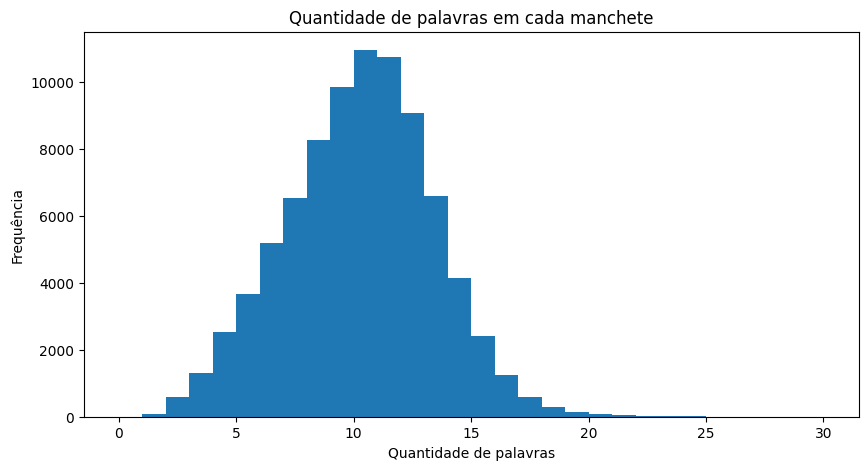

In [93]:
# Visualizando a quantidade de palavras em cada manchete

interval = (0,30)

df_word_length['word_length_headline'].plot(kind='hist', bins=30, figsize=(10, 5), range=interval)
plt.title('Quantidade de palavras em cada manchete')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Frequência')
plt.show()

In [26]:
df_word_length['word_length_headline'].describe()

count    84220.000000
mean         9.757172
std          3.137350
min          1.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         44.000000
Name: word_length_headline, dtype: float64

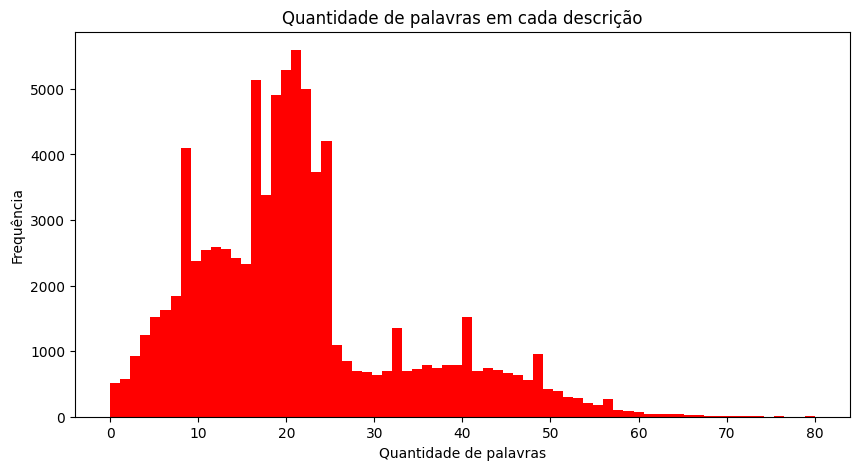

In [85]:
# Visualizando a quantidade de palavras em cada descrição

interval = (0, 80)

df_word_length['word_length_description'].plot(kind='hist', bins=70, figsize=(10, 5), color='red', range=interval)
plt.title('Quantidade de palavras em cada descrição')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Frequência')
plt.show()

In [28]:
df_word_length['word_length_description'].describe()

count    84220.000000
mean        21.532997
std         13.226110
min          1.000000
25%         13.000000
50%         20.000000
75%         25.000000
max        243.000000
Name: word_length_description, dtype: float64

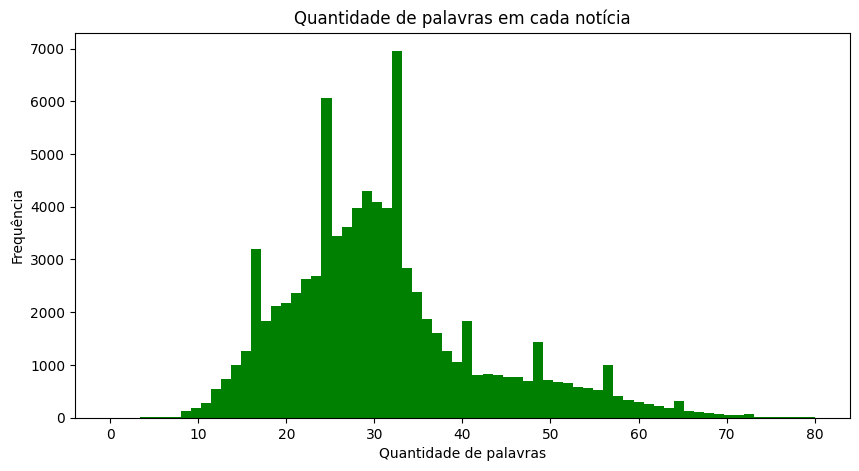

In [86]:
# Mostrando o total de palavras em todas as manchetes, com descrição e manchetes

interval = (0, 80)

df_word_length['total_word_length'].plot(kind='hist', bins=70, figsize=(10, 5), color='green', range=interval)
plt.title('Quantidade de palavras em cada notícia')
plt.xlabel('Quantidade de palavras')
plt.ylabel('Frequência')
plt.show()


In [30]:
# Visualizando a quantidade de palavras em cada notícia
df_word_length['total_word_length'].describe()

count    84220.000000
mean        31.290169
std         12.562055
min          3.000000
25%         23.000000
50%         29.000000
75%         36.000000
max        245.000000
Name: total_word_length, dtype: float64

In [31]:
# Removendo as noticias com quantidade de palavras total menor que 1.5*IQR

Q1 = df_word_length['total_word_length'].quantile(0.25)
Q3 = df_word_length['total_word_length'].quantile(0.75)
IQR = Q3 - Q1

# Calculando a quantidade de palavra total menor que 1.5*IQR
print('Q1 - 1.5*IQR:', Q1 - 1.5*IQR)
print('Quantidade de notícias com quantidade de palavras total menor que 1.5*IQR:', df_word_length[df_word_length['total_word_length'] < (Q1 - 1.5 * IQR)]['total_word_length'].count())

# Removendo as noticias com quantidade de palavras total menor que 1.5*IQR
df = df_word_length[df_word_length['total_word_length'] > (Q1 - 1.5 * IQR)]

Q1 - 1.5*IQR: 3.5
Quantidade de notícias com quantidade de palavras total menor que 1.5*IQR: 1


In [32]:
df.count()

link                       84219
headline                   84219
category                   84219
short_description          84219
authors                    84219
date                       84219
word_length_headline       84219
word_length_description    84219
total_word_length          84219
dtype: int64

# Tratamento em nível de tokens

## Tokenização

In [33]:
raw = df['short_description'].iloc[0]
raw

'For the past 18 months, Hollywood has effectively boycotted the Globes after reports that the HFPA’s 87 members of non-American journalists included no Black members.'

In [34]:
tokens = word_tokenize(raw, preserve_line=True)
tokens

['For',
 'the',
 'past',
 '18',
 'months',
 ',',
 'Hollywood',
 'has',
 'effectively',
 'boycotted',
 'the',
 'Globes',
 'after',
 'reports',
 'that',
 'the',
 'HFPA',
 '’',
 's',
 '87',
 'members',
 'of',
 'non-American',
 'journalists',
 'included',
 'no',
 'Black',
 'members',
 '.']

### Minúsculo

In [35]:
lowered_tokens = [token.lower() for token in tokens]
lowered_tokens

['for',
 'the',
 'past',
 '18',
 'months',
 ',',
 'hollywood',
 'has',
 'effectively',
 'boycotted',
 'the',
 'globes',
 'after',
 'reports',
 'that',
 'the',
 'hfpa',
 '’',
 's',
 '87',
 'members',
 'of',
 'non-american',
 'journalists',
 'included',
 'no',
 'black',
 'members',
 '.']

## Remoção de números e sinais de pontuação

In [36]:
words = [token for token in lowered_tokens if token.isalpha()]
words

['for',
 'the',
 'past',
 'months',
 'hollywood',
 'has',
 'effectively',
 'boycotted',
 'the',
 'globes',
 'after',
 'reports',
 'that',
 'the',
 'hfpa',
 's',
 'members',
 'of',
 'journalists',
 'included',
 'no',
 'black',
 'members']

## Remoção de Stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manoelsilva/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
no_stopwords_tokens = [word for word in words if word not in stopwords.words("english")]
no_stopwords_tokens

['past',
 'months',
 'hollywood',
 'effectively',
 'boycotted',
 'globes',
 'reports',
 'hfpa',
 'members',
 'journalists',
 'included',
 'black',
 'members']

## Lematização

In [40]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/manoelsilva/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
wnl = nltk.WordNetLemmatizer()

lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]
lemmatized_tokens

['For',
 'the',
 'past',
 '18',
 'month',
 ',',
 'Hollywood',
 'ha',
 'effectively',
 'boycotted',
 'the',
 'Globes',
 'after',
 'report',
 'that',
 'the',
 'HFPA',
 '’',
 's',
 '87',
 'member',
 'of',
 'non-American',
 'journalist',
 'included',
 'no',
 'Black',
 'member',
 '.']

## Stemming

In [42]:
porter = nltk.PorterStemmer()

steamed_tokens = [porter.stem(token) for token in tokens]
steamed_tokens

['for',
 'the',
 'past',
 '18',
 'month',
 ',',
 'hollywood',
 'ha',
 'effect',
 'boycot',
 'the',
 'globe',
 'after',
 'report',
 'that',
 'the',
 'hfpa',
 '’',
 's',
 '87',
 'member',
 'of',
 'non-american',
 'journalist',
 'includ',
 'no',
 'black',
 'member',
 '.']

## Função de tratamento

In [43]:
def tokenize_text(text):
    # Tokenização
    tokens = word_tokenize(text, preserve_line=True)

    return tokens

def lower_tokens(tokens):
    # Conversão para minúsculas
    tokens = [token.lower() for token in tokens]

    return tokens

def concatenate_tokens(tokens):
    # Concatenando tokens separados por espaços
    tokens_as_text = ' '.join(tokens)

    return tokens_as_text

def remove_not_words(tokens):
    # Remoção de tokens que não são palavras (somente caracteres alfabéticos)
    words = [token for token in tokens if token.isalpha()]

    return words

def remove_stop_words(tokens):
    # Remoção de stop words
    stop_words = set(stopwords.words('english'))
    filtered_words = [token for token in tokens if token not in stop_words]

    return filtered_words

def lemmatize_tokens(tokens):
    wnl = nltk.WordNetLemmatizer()

    lemmatized_tokens = [wnl.lemmatize(token) for token in tokens]

    return lemmatized_tokens

def stemming_tokens(tokens):
    # Stemming
    porter = nltk.PorterStemmer()

    steamed_tokens = []

    for token in tokens:
        steamed_token = porter.stem(token)

        # Remoção de tokens com menos de 3 caracteres
        if len(steamed_token) > 2:
            steamed_tokens.append(steamed_token)

    return steamed_tokens

In [44]:
def process_text(text):
    tokens = tokenize_text(text)
    tokens = remove_not_words(tokens)
    tokens = lower_tokens(tokens)
    tokens = remove_stop_words(tokens)
    tokens = stemming_tokens(tokens)

    return concatenate_tokens(tokens)

In [45]:
process_text(raw)

'past month hollywood effect boycot globe report hfpa member journalist includ black member'

## Metadados

In [46]:
def count_words(all_text_tokens):
    return sum(len(tokens) for tokens in all_text_tokens)

def count_distinct_words(all_text_tokens):
    distinct_tokens = set(token for tokens in all_text_tokens for token in tokens)

    return len(distinct_tokens)

## Tratamento de todos os documentos

### Etapas

1. Tokenização, remoção de números/pontuação e transformação para minúsculo
2. Remoção de stopwords
3. Aplicação do Stemming

### Casos

1. Título
2. Resumo
3. Título + Resumo

In [47]:
def tokenize_all_texts(df, columns):
    all_texts_tokens = []

    for index, instance in df.iterrows():
        instance_tokens = []

        for column in columns:
            text = instance[column]
            tokens = tokenize_text(text)

            tokens = remove_not_words(tokens)
            tokens = lower_tokens(tokens)

            instance_tokens = instance_tokens + tokens

        all_texts_tokens.append(instance_tokens)
    
    return all_texts_tokens

### Caso 1 (Título)

#### Tokenização e filtragem de palavras

In [48]:
columns = ['headline']

all_texts_tokens_1 = tokenize_all_texts(df, columns)

total_words = count_words(all_texts_tokens_1)
distinct_words = count_distinct_words(all_texts_tokens_1)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 781095
Total de palavras distintas: 34312


#### Remoção de stopwords

In [49]:
for i in range(len(all_texts_tokens_1)):
    all_texts_tokens_1[i] = remove_stop_words(all_texts_tokens_1[i])

total_words = count_words(all_texts_tokens_1)
distinct_words = count_distinct_words(all_texts_tokens_1)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 543900
Total de palavras distintas: 34164


#### Stemming

In [50]:
for i in range(len(all_texts_tokens_1)):
    all_texts_tokens_1[i] = stemming_tokens(all_texts_tokens_1[i])

total_words = count_words(all_texts_tokens_1)
distinct_words = count_distinct_words(all_texts_tokens_1)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 537231
Total de palavras distintas: 23380


### Caso 2 (Resumo)

#### Tokenização e filtragem de palavras

In [51]:
columns = ['short_description']
all_texts_tokens_2 = tokenize_all_texts(df, columns)

total_words = count_words(all_texts_tokens_2)
distinct_words = count_distinct_words(all_texts_tokens_2)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 1740982
Total de palavras distintas: 47849


#### Remoção de stopwords

In [52]:
for i in range(len(all_texts_tokens_2)):
    all_texts_tokens_2[i] = remove_stop_words(all_texts_tokens_2[i])

total_words = count_words(all_texts_tokens_2)
distinct_words = count_distinct_words(all_texts_tokens_2)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 935789
Total de palavras distintas: 47699


#### Stemming

In [53]:
for i in range(len(all_texts_tokens_2)):
    all_texts_tokens_2[i] = stemming_tokens(all_texts_tokens_2[i])

total_words = count_words(all_texts_tokens_2)
distinct_words = count_distinct_words(all_texts_tokens_2)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 922907
Total de palavras distintas: 31619


### Caso 3 (Título + Resumo)

#### Tokenização e filtragem de palavras

In [54]:
columns = ['short_description', 'headline']
all_texts_tokens_3 = tokenize_all_texts(df, columns)

total_words = count_words(all_texts_tokens_3)
distinct_words = count_distinct_words(all_texts_tokens_3)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 2522077
Total de palavras distintas: 54877


#### Remoção de stopwords

In [55]:
for i in range(len(all_texts_tokens_3)):
    all_texts_tokens_3[i] = remove_stop_words(all_texts_tokens_3[i])

total_words = count_words(all_texts_tokens_3)
distinct_words = count_distinct_words(all_texts_tokens_3)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 1479689
Total de palavras distintas: 54727


#### Stemming

In [56]:
for i in range(len(all_texts_tokens_3)):
    all_texts_tokens_3[i] = stemming_tokens(all_texts_tokens_3[i])

total_words = count_words(all_texts_tokens_3)
distinct_words = count_distinct_words(all_texts_tokens_3)

print(f'Total de palavras: {total_words}')
print(f'Total de palavras distintas: {distinct_words}')

Total de palavras: 1460138
Total de palavras distintas: 36403


### Concatenar todos os tokens

In [57]:
all_texts_tokens_1 = [concatenate_tokens(tokens) for tokens in all_texts_tokens_1]
all_texts_tokens_2 = [concatenate_tokens(tokens) for tokens in all_texts_tokens_2]
all_texts_tokens_3 = [concatenate_tokens(tokens) for tokens in all_texts_tokens_3]

### Armazenamento de todos os tokens

In [58]:
df_tokens = pd.DataFrame({
    'headline': all_texts_tokens_1,
    'short_description': all_texts_tokens_2,
    'mix': all_texts_tokens_3,
    'category': df['category']})

df_tokens.to_csv('news_tokens.csv', index=False)

# Vetorização dos documentos

## Seleção de instâncias

## Por frequência

In [59]:
frequency_vectorizer = CountVectorizer()

frequency_vecs_1 = frequency_vectorizer.fit_transform(all_texts_tokens_1)
frequency_vecs_2 = frequency_vectorizer.fit_transform(all_texts_tokens_2)
frequency_vecs_3 = frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(frequency_vecs_1.shape)
print(frequency_vecs_2.shape)
print(frequency_vecs_3.shape)

(84219, 23380)
(84219, 31619)
(84219, 36403)


### Armazenando com numpy

In [60]:
np.savez_compressed('frequency_vectors.npz', 
        headline=frequency_vecs_1, 
        short_description=frequency_vecs_2, 
        mix=frequency_vecs_3, 
        category=df['category'])

## Por frequência inversa

In [61]:
inverse_frequency_vectorizer = TfidfVectorizer()

inverse_frequency_vecs_1 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_1)
inverse_frequency_vecs_2 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_2)
inverse_frequency_vecs_3 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(inverse_frequency_vecs_1.shape)
print(inverse_frequency_vecs_2.shape)
print(inverse_frequency_vecs_3.shape)

(84219, 23380)
(84219, 31619)
(84219, 36403)


### Armazenando com numpy

In [62]:
np.savez_compressed('inverse_frequency_vectors.npz',
        headline=inverse_frequency_vecs_1, 
        short_description=inverse_frequency_vecs_2, 
        mix=inverse_frequency_vecs_3, 
        category=df['category'])

## Seleção de Features

In [64]:
# Cortando a vetorização para 10000 dimensões, ou seja, as 10000 palavras mais frequentes

frequency_vectorizer = CountVectorizer(max_features=10000)
inverse_frequency_vectorizer = TfidfVectorizer(max_features=10000)

frequency_vecs_1 = frequency_vectorizer.fit_transform(all_texts_tokens_1)
frequency_vecs_2 = frequency_vectorizer.fit_transform(all_texts_tokens_2)
frequency_vecs_3 = frequency_vectorizer.fit_transform(all_texts_tokens_3)

inverse_frequency_vecs_1 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_1)
inverse_frequency_vecs_2 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_2)
inverse_frequency_vecs_3 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_3)

print('Formato da Frequencia:')
print(frequency_vecs_1.shape)
print(frequency_vecs_2.shape)
print(frequency_vecs_3.shape)

print('Formato da Frequencia Inversa:')
print(inverse_frequency_vecs_1.shape)
print(inverse_frequency_vecs_2.shape)
print(inverse_frequency_vecs_3.shape)


Formato da Frequencia:
(84219, 10000)
(84219, 10000)
(84219, 10000)
Formato da Frequencia Inversa:
(84219, 10000)
(84219, 10000)
(84219, 10000)


In [73]:
# Cortando para as palavras que aparecem em pelo menos 0.1% das notícias
inverse_frequency_vectorizer = TfidfVectorizer(min_df=0.001)

inverse_frequency_vecs_1 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_1)
inverse_frequency_vecs_2 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_2)
inverse_frequency_vecs_3 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(inverse_frequency_vecs_1.shape)
print(inverse_frequency_vecs_2.shape)
print(inverse_frequency_vecs_3.shape)

# Quantas noticias não possuem palavras que aparecem em pelo menos 0.1% das noticias em 'mix'
print('Total de noticias:', inverse_frequency_vecs_3.shape[0])
print('Noticias sem palavras que aparecem em pelo menos 0.1% das noticias:', np.sum(inverse_frequency_vecs_3.sum(axis=1) == 0))

(84219, 1291)
(84219, 1911)
(84219, 2625)
Total de noticias: 84219
Noticias sem palavras que aparecem em pelo menos 0.1% das noticias: 3


In [74]:
# Cortando para as palavras que aparecem em pelo menos 0.5% das notícias
inverse_frequency_vectorizer = TfidfVectorizer(min_df=0.005)

inverse_frequency_vecs_1 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_1)
inverse_frequency_vecs_2 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_2)
inverse_frequency_vecs_3 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(inverse_frequency_vecs_1.shape)
print(inverse_frequency_vecs_2.shape)
print(inverse_frequency_vecs_3.shape)

# Quantas noticias não possuem palavras que aparecem em pelo menos 0.1% das noticias em 'mix'
print('Total de noticias:', inverse_frequency_vecs_3.shape[0])
print('Noticias sem palavras que aparecem em pelo menos 0.1% das noticias:', np.sum(inverse_frequency_vecs_3.sum(axis=1) == 0))

(84219, 182)
(84219, 435)
(84219, 681)
Total de noticias: 84219
Noticias sem palavras que aparecem em pelo menos 0.1% das noticias: 108


In [75]:
# Cortando para as palavras que aparecem em pelo menos 1% das notícias
inverse_frequency_vectorizer = TfidfVectorizer(min_df=0.01)

inverse_frequency_vecs_1 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_1)
inverse_frequency_vecs_2 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_2)
inverse_frequency_vecs_3 = inverse_frequency_vectorizer.fit_transform(all_texts_tokens_3)

print(inverse_frequency_vecs_1.shape)
print(inverse_frequency_vecs_2.shape)
print(inverse_frequency_vecs_3.shape)

# Quantas noticias não possuem palavras que aparecem em pelo menos 0.1% das noticias em 'mix'
print('Total de noticias:', inverse_frequency_vecs_3.shape[0])
print('Noticias sem palavras que aparecem em pelo menos 0.1% das noticias:', np.sum(inverse_frequency_vecs_3.sum(axis=1) == 0))

(84219, 60)
(84219, 156)
(84219, 263)
Total de noticias: 84219
Noticias sem palavras que aparecem em pelo menos 0.1% das noticias: 828
